In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

In [4]:
cols_to_drop = ["profit_margin"]
train_df = pd.read_csv("train.csv")
val_df = pd.read_csv("validation.csv")
# val_df = pd.read_csv("test.csv")
X_train = train_df.drop(columns=cols_to_drop)
X_val = val_df.drop(columns=cols_to_drop)
y_train = train_df["profit_margin"]
y_val = val_df["profit_margin"]

In [12]:
grid_space = {"max_depth":[3, 5, 10, None],
              "n_estimators":[10, 100, 200],
              "max_features":["sqrt", "log2", None],
              "min_samples_leaf":[1, 2, 4],
              "min_samples_split":[2, 5, 8]
              }
random_forest = RandomForestRegressor()
# grid = GridSearchCV(random_forest, param_grid=grid_space, cv=3)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_pred, y_val))
mae = mean_absolute_error(y_pred, y_val)
rmse_logged = np.sqrt(mean_squared_error(np.log(y_pred), np.log(y_val)))
mae_logged = mean_absolute_error(np.log(y_pred), np.log(y_val))
rmse, mae, rmse_logged, mae_logged

(0.6816250712156187,
 0.5444692441973978,
 0.9914571956982925,
 0.5602500590062938)

In [21]:
results_df = pd.DataFrame(columns=["max_depth", "n_estimators", "max_features", "min_samples_leaf", "min_samples_split"])
i = 0
for max_depth in [3, 5, 10, None]:
    for n_estimators in [10, 100, 200]:
        for max_features in ["sqrt", "log2", None]:
            for min_samples_leaf in [1, 2, 4]:
                for min_samples_split in [2, 5, 8]:
                    random_forest = RandomForestRegressor(
                        max_depth=max_depth, 
                        n_estimators=n_estimators,
                        max_features=max_features,
                        min_samples_leaf=min_samples_leaf,
                        min_samples_split=min_samples_split,
                        )
                    params_dict = {"max_depth": max_depth, 
                                    "n_estimators": n_estimators, 
                                    "max_features": max_features,
                                    "min_samples_leaf": min_samples_leaf,
                                    "min_samples_split": min_samples_split
                                    }
                    print("training with param dict:\n", params_dict)
                    random_forest.fit(X_train, y_train)
                    y_pred = random_forest.predict(X_val)
                    rmse = np.sqrt(mean_squared_error(y_pred, y_val))
                    mae = mean_absolute_error(y_pred, y_val)
                    rmse_logged = np.sqrt(mean_squared_error(np.log(y_pred), np.log(y_val)))
                    mae_logged = mean_absolute_error(np.log(y_pred), np.log(y_val))
                    new_entry = pd.DataFrame({"max_depth": max_depth, 
                                              "n_estimators": n_estimators, 
                                              "max_features": max_features,
                                              "min_samples_leaf": min_samples_leaf,
                                              "min_samples_split": min_samples_split,
                                              "rmse": rmse,
                                              "rmse_logged": rmse_logged,
                                              "mae": mae,
                                              "mae_logged": mae_logged}, index=[i])
                    i += 1
                    print(f"\tGot results: rmse: {rmse}, rmse_logged: {rmse_logged}, mae: {mae}, mae_logged: {mae_logged}")
                    results_df = pd.concat([results_df, new_entry])

training with param dict:
 {'max_depth': 3, 'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
	Got results: rmse: 0.7013346485490819, rmse_logged: 1.0179629573732305, mae: 0.5927905174924822, mae_logged: 0.5873995677820052
training with param dict:
 {'max_depth': 3, 'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
	Got results: rmse: 0.7151069587491029, rmse_logged: 1.0247937316595508, mae: 0.6023308741820329, mae_logged: 0.5938496164229328
training with param dict:
 {'max_depth': 3, 'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 8}
	Got results: rmse: 0.703817981357908, rmse_logged: 1.0195541317133376, mae: 0.5944692830171848, mae_logged: 0.5886952122729376
training with param dict:
 {'max_depth': 3, 'n_estimators': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
	Got results: rmse: 0.7030609320952625, rmse_logged: 1.0176619489432128, m

In [22]:
results_df.sort_values(by="rmse_logged")

,max_depth,n_estimators,max_features,min_samples_leaf,min_samples_split,rmse,rmse_logged,mae,mae_logged
288,None,100,None,1,2,0.609706,0.940923,0.476742,0.506308
263,None,10,None,1,8,0.629734,0.941950,0.490238,0.519566
315,None,200,None,1,2,0.605552,0.942053,0.472858,0.504017
322,None,200,None,4,5,0.604423,0.942441,0.471782,0.503638
316,None,200,None,1,5,0.609384,0.942796,0.475865,0.506371
...,...,...,...,...,...,...,...,...,...
10,3,10,log2,1,5,0.720194,1.030259,0.612010,0.599589
64,3,200,log2,1,5,0.721065,1.030595,0.611759,0.599348
4,3,10,sqrt,2,5,0.720969,1.030741,0.607670,0.597127
15,3,10,log2,4,2,0.727407,1.030896,0.617269,0.603187


In [13]:
rmse, mae, rmse_logged, mae_logged

(0.6816250712156187,
 0.5444692441973978,
 0.9914571956982925,
 0.5602500590062938)

In [42]:
rmse = np.sqrt(mean_squared_error(y_pred, y_val))
rmse 

0.668980640702459

In [43]:
mae = mean_absolute_error(y_pred, y_val)
mae

0.5457130952545353

<Axes: >

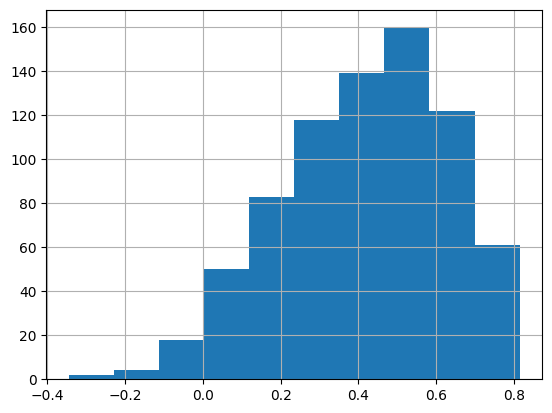

In [44]:
pd.Series(np.log(y_pred)).hist()

<Axes: >

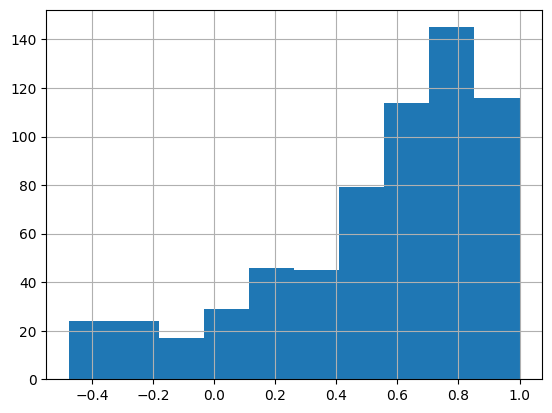

In [45]:
pd.Series(np.log(y_val[np.log(y_val) > -0.5])).hist()

(array([557., 110.,  27.,  17.,  16.,  11.,   7.,   5.,   3.,   4.]),
 array([4.25061782e-04, 5.45838991e-01, 1.09125292e+00, 1.63666685e+00,
        2.18208078e+00, 2.72749471e+00, 3.27290864e+00, 3.81832257e+00,
        4.36373650e+00, 4.90915043e+00, 5.45456436e+00]),
 <BarContainer object of 10 artists>)

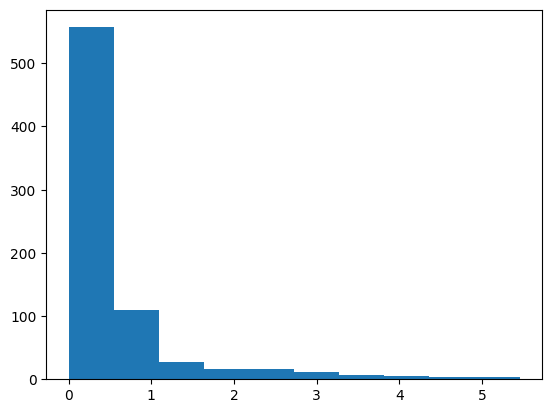

In [46]:
# pd.Series(y_val).hist()
plt.hist(np.abs(np.log(y_val) - np.log(y_pred)))

In [24]:
random_forest_second_best = RandomForestRegressor(n_estimators=10, min_samples_split=8)
random_forest_default = RandomForestRegressor()
random_forest_default.fit(X_train, y_train)
random_forest_second_best.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=8, n_estimators=10)

In [25]:
test_df = pd.read_csv("test.csv")
X_test = test_df.drop(columns="profit_margin")
y_test = test_df["profit_margin"]
y_pred_test_default = random_forest_default.predict(X_test)
y_pred_test_second_best = random_forest_second_best.predict(X_test)


In [26]:
# default
stats.ttest_ind(y_test, y_pred_test_default)

TtestResult(statistic=-0.04046110298142949, pvalue=0.9677308516665186, df=1514.0)

In [27]:
# default
np.sqrt(mean_squared_error(y_test, y_pred_test_default))

0.6311355018729137

In [28]:
# default
mean_absolute_error(y_test, y_pred_test_default)

0.5085941284966687

In [29]:
# second best
stats.ttest_ind(y_test, y_pred_test_second_best)

TtestResult(statistic=0.06843524517653446, pvalue=0.9454482026990194, df=1514.0)

In [31]:
# second best 
np.sqrt(mean_squared_error(y_test, y_pred_test_second_best))

0.6509411051267914

In [32]:
mean_absolute_error(y_test, y_pred_test_second_best)

0.5172744035979752

In [36]:
total_X = pd.concat([X_train, X_val])
total_y = pd.concat([y_train, y_val])
default_cross_val = cross_val_score(random_forest_default, total_X, total_y, cv=10)
default_cross_val.mean()

0.35000981272491966

In [37]:
second_best_cross_val = cross_val_score(random_forest_second_best, total_X, total_y, cv=10)
second_best_cross_val.mean()

0.3096244830195671

Text(0, 0.5, 'Count')

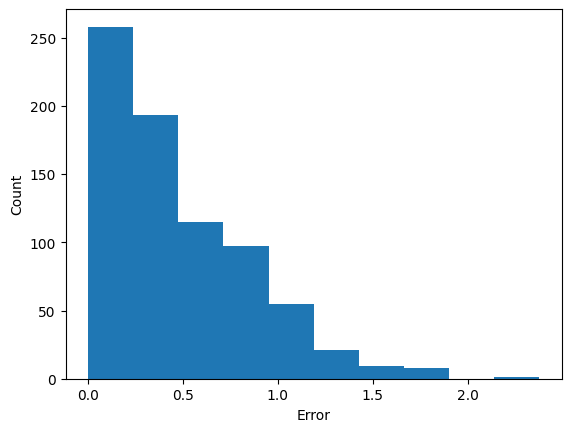

In [45]:
y_pred_val = random_forest_default.predict(X_val)
plt.hist(np.abs(y_pred_val - y_val))
# plt.title("Histogram of Absolute Error between Predictions and Validation")
plt.xlabel("Error")
plt.ylabel("Count")